<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
def scatterplot(X_,Y_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('Componente principal 1',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('Componente principal 2',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [7]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,namefile_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    plt.plot(serie_)
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [85]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Eolicas = 'https://drive.google.com/file/d/1FNMdGkhjypcGTAtPeOfw12EuAolUJ4Fh/view?usp=sharing'
URL_Demanda = 'https://drive.google.com/file/d/1KpY2p4bfVEwGRh5tJjMx9QpH6SEwrUwH/view?usp=sharing'
df = pd.read_csv(path + URL_Demanda.split('/')[-2], usecols=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','Y'] )
dfx = df[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18',]]
dfy = df[['Y']]
#dfx  = pd.read_csv(path + URL_Eolicas.split('/')[-2], usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35] ) #names=['CLVUNI','TYPE','NODE'], usecols=[1,2,3,4,5,6,], 1,2,3,4,5,6,7,8,9,10,11,12,13,15,
#dfx.dropna(inplace=True)
#dfx = df.iloc[:1500, :]
#dfx.head()

In [86]:
X = dfx.to_numpy()
y = dfy.to_numpy()
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.7, random_state = 5)

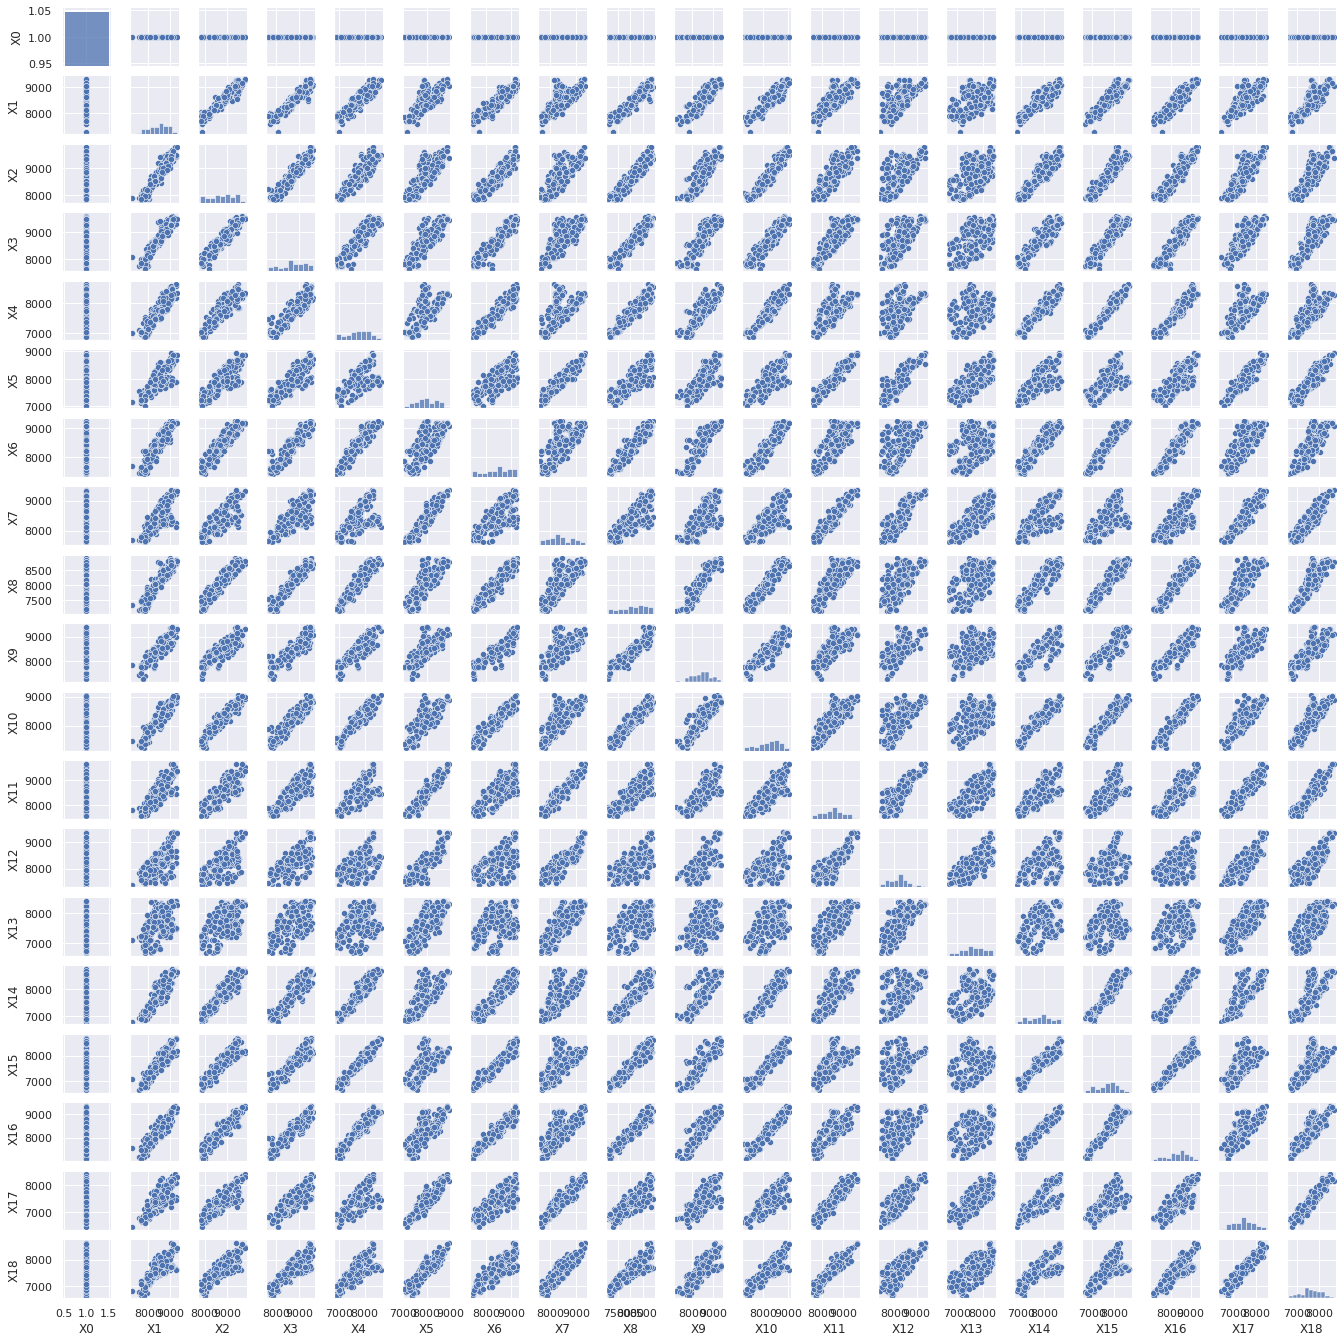

In [103]:
sns.set_theme(style = 'ticks')
sns.set(font_scale=1)
sns.pairplot( dfx.sample(n=200,replace=False) , height=1) 
plt.savefig('fig_t14_corr_dem.png',transparent=True)

### Análisis de componentes principales en Regresión

Análisis de componentes principales es un métodos de reducción de dimensiones que puede ser usado paraescoger un subconjunto de variables que expliquen la mayor varianza, es decir que representen en mayor medida los datos originales. Las variables eliminadas serán redundates con otras. Además otras variables isntéticas llamadas latentes o componentes en el PCA pueden explicar partes importantes del fenómeno. El enfoque se basa en reducir el número de predictores a una dimensión más pequeña mediante el análisis de componentes principales. Estos componentes principales luego se utilizan como regresores al ajustar un nuevo modelo OLS.

99.91460521885719


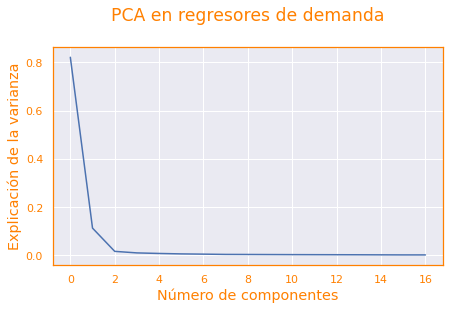

In [106]:
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
pca = PCA(0.999) 
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pcat = pca.transform(X_test)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en regresores de demanda\n','Explicación de la varianza','Número de componentes','fig_t14__variance_pca_9999per')

In [115]:
pca.components_
pca.n_components_
pca.singular_values_

array([50.24705368, 18.58794141,  7.01973703,  5.43557514,  4.73759517,
        4.10603429,  3.7076992 ,  3.1959674 ])

### Calculamos la regresión

In [116]:
model      = LinearRegression().fit(X_train[:, :], y_train)
err1_mae = np.mean(np.abs(y_train - model.predict(X_train)))
err1_mae_test = np.mean(np.abs(y_test - model.predict(X_test)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err1_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err1_mae_test)

# calculating VIF for each feature
for i in range(X_train.shape[1]):
    print(variance_inflation_factor(X_train,i))  

MAE del modelo de regresión con datos de entrenamiento con sklearn: 102.03653229489723
MAE del modelo de regresión con datos de prueba con sklearn: 131.86027342669107
nan
19.268815602047138
25.900291272307413
21.75005645732436
31.3039369332227
16.94503888144909
23.182547018706778
21.415405802141464
32.21371857799564
13.042998282179228
19.990213915947887
18.269618431784952
9.088089141611725
4.594616265979086
33.45388030260464
26.546509209585857
31.938715377963362
17.948772566166706
21.219310770169713


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [117]:
linreg_model      = LinearRegression().fit(X_pca[:, :], y_train)
err2_mae = np.mean(np.abs(y_train - linreg_model.predict(X_pca)))
err2_mae_test = np.mean(np.abs(y_test - linreg_model.predict(X_pcat)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err2_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err2_mae_test)

# calculating VIF for each feature
for i in range(X_pcat.shape[1]):
    print(variance_inflation_factor(X_pcat,i))  

MAE del modelo de regresión con datos de entrenamiento con sklearn: 111.79413703293265
MAE del modelo de regresión con datos de prueba con sklearn: 130.55280746630132
1.0202126662701723
1.0309617986088888
1.0433254564831038
1.0802131687107597
1.0239019535969995
1.0637878942632697
1.0605053887139235
1.0088605587066386


98.0482312476889


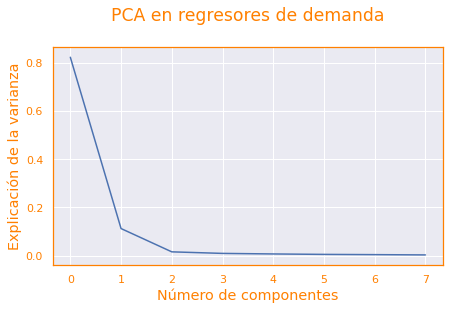

In [118]:
pca = PCA(0.98) 
pca.fit(X_train)
X_pca = pca.transform(X_train)
X_pcat = pca.transform(X_test)
print(sum(pca.explained_variance_ratio_ * 100))
print_serie(pca.explained_variance_ratio_,'PCA en regresores de demanda\n','Explicación de la varianza','Número de componentes','fig_t14_variance_pca2_98perc')

In [119]:
linreg_model  = LinearRegression().fit(X_pca[:, :], y_train)
err3_mae      = np.mean(np.abs(y_train - linreg_model.predict(X_pca)))
err3_mae_test = np.mean(np.abs(y_test - linreg_model.predict(X_pcat)))
print("MAE del modelo de regresión con datos de entrenamiento con sklearn:", err3_mae)
print("MAE del modelo de regresión con datos de prueba con sklearn:", err3_mae_test)

# calculating VIF for each feature
for i in range(X_pcat.shape[1]):
    print(variance_inflation_factor(X_pcat,i)) 

MAE del modelo de regresión con datos de entrenamiento con sklearn: 111.79413703293265
MAE del modelo de regresión con datos de prueba con sklearn: 130.55280746630132
1.0202126662701723
1.0309617986088888
1.0433254564831038
1.0802131687107597
1.0239019535969995
1.0637878942632697
1.0605053887139235
1.0088605587066386


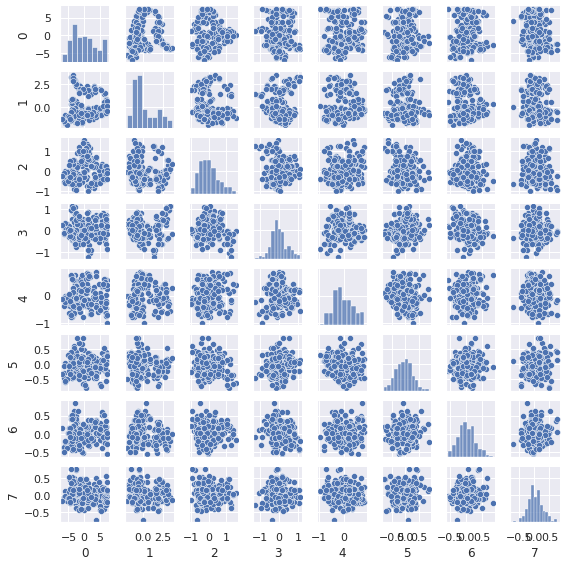

In [123]:
sns.set_theme(style = 'ticks') #style = ''
sns.set(font_scale=1) 
dfaux = pd.DataFrame(X_pcat).sample(n=200,replace=False)
sns.pairplot(dfaux, height=1)
plt.savefig('fig_t14_corr_pca.png',transparent=True)

### PCA from Scratch

In [120]:
def PCAfromScratch(X , num_components):     
    X_meaned = X - np.mean(X , axis = 0)     
    cov_mat = np.cov(X_meaned , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    idx                 = np.argsort(eigen_values)[::-1]
    print(idx)
    sorted_eigenvalue   = eigen_values[idx]
    sorted_eigenvectors = eigen_vectors[:,idx]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced, eigen_values, 

In [121]:
#Applying it to PCA function
mat_reduced ,eigen_values, = PCAfromScratch(X , 12)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced)
principal_df


[34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11
 10  9  8  7  6  5  4  3  2  1  0]


,0,1,2,3,4,5,6,7,8,9,10,11
0,3.768657,-2.583177,0.940024,-0.148821,0.237604,-0.100433,0.254827,1.267278,0.169165,-0.020523,-0.782624,-0.472844
1,-3.714405,2.009328,-0.152343,-0.400329,0.062274,0.955752,-0.534978,0.402213,0.115247,0.238343,0.090211,0.005398
2,6.295023,-1.585566,2.104697,-0.332582,0.206353,1.802140,-0.688258,0.269623,0.943284,0.014434,-0.184494,0.358937
3,3.887159,-2.356254,-0.803120,-1.344140,2.642867,1.492048,2.380827,0.938857,-0.035338,-0.351257,0.739348,-0.698715
4,-3.816881,1.234266,0.002792,0.190573,0.869278,1.453693,-0.046766,-1.125238,0.154908,-1.301885,-0.558415,-0.414956
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-3.783891,1.555707,-0.051479,-0.070577,0.530182,1.221605,-0.259527,-0.616323,0.170776,-0.830858,-0.342475,-0.276351
1996,-4.926688,-2.586300,1.398458,-0.265647,-0.750828,-0.645839,0.080834,-0.700339,-0.138190,-0.787361,-1.779188,0.053760
1997,-4.818377,-1.448765,0.958507,-0.517872,-1.083758,-0.696716,-0.068042,1.092227,0.242201,0.326900,0.383597,0.333788
1998,-3.700569,1.851906,-0.157516,-0.221705,0.242244,1.150077,-0.398341,0.545803,0.005563,0.536683,0.151800,0.050192


[Eliminar multicolinealidad con PCA](https://medium.com/@awabmohammedomer/principal-component-analysis-pca-in-python-6897664f97d6#:~:text=PCA%20aims%20to%20reduce%20dimensionality,original%20data%20with%20less%20noise.)


[collinearity-and-multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f)

[Dimension Reduction: Principal Components and Partial Least Squares Regression](https://www.datasklr.com/extensions-of-ols-regression/dimension-reduction-principal-components-regression)

En términos de variables aleatorias, podemos interpretar las descomposición de valores singulares (SVD) o el correspondiente análisis de componentes principales (PCA) como un modelo de estimación de las variables latentes Ecuación (14.78) del Libro.

En el apartado 14.7 del libro se hace la diferencia entre el PCA y el Análisis Fcatorial, se puede ver que el análisis factorial está modelando la estructura de correlación en lugar de la estructura de covarianza de X.

### Análisis factorial en selección de parques eólicos representativos de una región

Sección del libro 14.7.1 Latent Variables and Factor Analysis

En México, una gran cantidad de párques eólicos esta instalados en el Itzmo de Tehuantepec, Oaxaca. Los parques están distribuidos geográficamente en toda la zona

In [8]:
#https://drive.google.com/drive/folders/1Gj3XK9kM-lE18uBMe3qrZOGEm8yAI8i9
#https://www.codegrepper.com/code-examples/python/how+to+read+csv+file+from+google+drive+on+google+colab+
path        = 'https://drive.google.com/uc?export=download&id=' 
URL_Eolicas = 'https://drive.google.com/file/d/1FNMdGkhjypcGTAtPeOfw12EuAolUJ4Fh/view?usp=sharing'
df = pd.read_csv(path + URL_Eolicas.split('/')[-2], usecols=['EOL1','EOL2','EOL3','EOL4','EOL5','EOL6','EOL7','EOL8','EOL9','EOL10','EOL12','EOL13','EOL14','EOL15','EOL16','EOL17','EOL18','EOL19','EOL20','EOL21','EOL22','EOL23','EOL24','EOL25','EOL26','EOL27','EOL28','EOL29','EOL30','EOL31','EOL32','EOL33','EOL34','EOL35','EOL36'] )
df = df.dropna()
#df = df.iloc[:, :]
#df = df.iloc[1000:2000, :]
df = df.sample(n=2000,replace=False)
X = df.to_numpy()
X = StandardScaler().fit_transform(X)

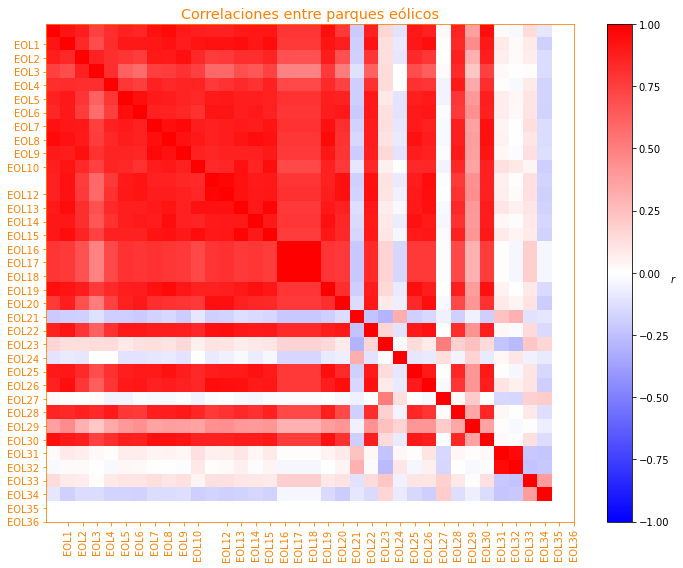

In [9]:
plt.figure(figsize = (10,8))
ax = plt.axes()
im = ax.imshow(np.corrcoef(X.T), cmap="bwr", vmin=-1, vmax=1, aspect='auto')
feature_names = ['EOL1','EOL2','EOL3','EOL4','EOL5','EOL6','EOL7','EOL8','EOL9','EOL10','EOL12','EOL13','EOL14','EOL15','EOL16','EOL17','EOL18','EOL19','EOL20','EOL21','EOL22','EOL23','EOL24','EOL25','EOL26','EOL27','EOL28','EOL29','EOL30','EOL31','EOL32','EOL33','EOL34','EOL35','EOL36']
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
ax.set_xticklabels(list(feature_names), rotation=90)
ax.set_yticks([1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])
ax.set_yticklabels(list(feature_names))

plt.tick_params(colors = LETRASNARA, which='both')
ax.spines['bottom'].set_color(LETRASNARA)
ax.spines['top'   ].set_color(LETRASNARA) 
ax.spines['right' ].set_color(LETRASNARA)
ax.spines['left'  ].set_color(LETRASNARA)    


plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Correlaciones entre parques eólicos", color=LETRASNARA, fontsize='x-large')
plt.savefig('fig_t14_corr_eol', transparent=True)    
plt.tight_layout()



 PCA :

[[ 2.00911624e-01  2.76810433e-02  7.73609983e-03 -4.72701226e-02]
 [ 2.03843597e-01 -2.21142064e-02  3.32195977e-02 -2.96984204e-03]
 [ 1.87819004e-01 -1.44562684e-02  4.66460262e-02 -1.91079167e-01]
 [ 1.57328210e-01 -1.94100989e-02  1.41714917e-01 -3.60839812e-01]
 [ 1.86259630e-01 -2.76385268e-03  5.14575367e-02 -1.73429586e-01]
 [ 1.97390769e-01 -2.18427612e-02 -4.54611271e-02  6.21186891e-02]
 [ 1.96485096e-01 -1.27758614e-02 -3.36242899e-02  9.93951778e-02]
 [ 2.02997337e-01  6.46096167e-04 -1.09402199e-02 -6.05869507e-02]
 [ 2.03984481e-01 -1.41317961e-02  9.87299151e-03 -6.94742790e-02]
 [ 1.99864783e-01  1.12705506e-02  1.07750333e-02 -9.88502084e-02]
 [ 1.93756607e-01 -7.98599800e-02  6.65182624e-02 -9.92339948e-02]
 [ 1.98777907e-01 -1.25589877e-02 -1.80624321e-02  9.27263805e-02]
 [ 2.00636415e-01 -1.73008387e-02 -4.72282008e-03  9.14222470e-02]
 [ 2.01682153e-01 -5.12531144e-02  3.06638970e-02  1.24336015e-03]
 [ 1.99737102e-01 -1.38648325e-02 -1.41817505e-02 -1

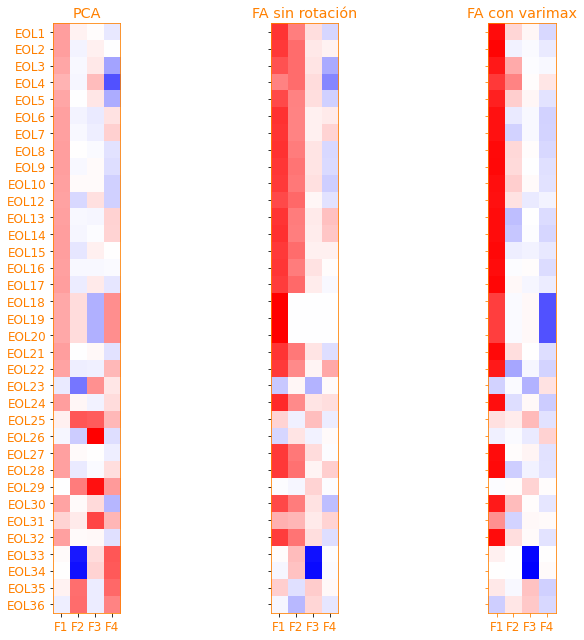

In [10]:
n_comps = 4

methods = [("PCA", PCA()),("FA sin rotación", FactorAnalysis()),("FA con varimax", FactorAnalysis(rotation="varimax")),]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10,9))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="bwr", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names, color=LETRASNARA, fontsize='large')
        plt.tick_params(colors = LETRASNARA)
    else:
        ax.set_yticklabels([], color=LETRASNARA, fontsize='large')
        plt.tick_params(colors = LETRASNARA)

    ax.set_title(str(method), color=LETRASNARA, fontsize='x-large')
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(["F1","F2","F3","F4"], color=LETRASNARA, fontsize='large')

    ax.spines['bottom'].set_color(LETRASNARA)
    ax.spines['top'   ].set_color(LETRASNARA) 
    ax.spines['right' ].set_color(LETRASNARA)
    ax.spines['left'  ].set_color(LETRASNARA)

plt.tight_layout()
plt.savefig('fig_t14_varimax', transparent=True) 
plt.show()

# 14.3.12 Hierarchical Clustering

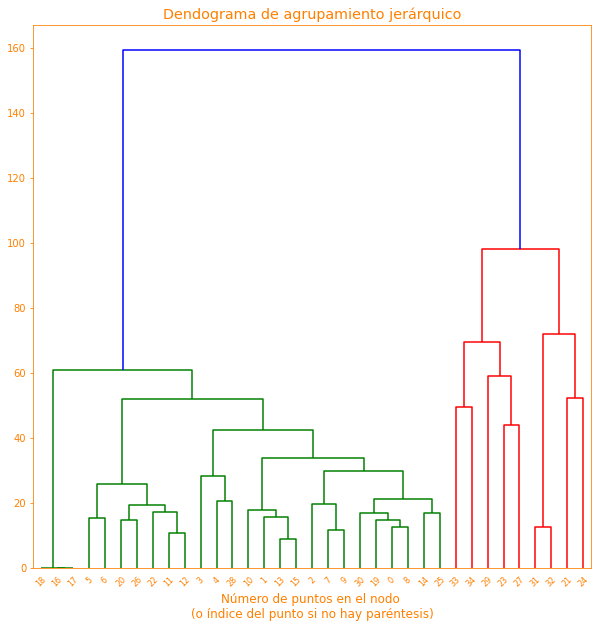

In [11]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#
#https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/cluster-observations/interpret-the-results/all-statistics-and-graphs/dendrogram/#:~:text=Interpretaci%C3%B3n,una%20l%C3%ADnea%20horizontal%20del%20dendrograma.

    # Create linkage matrix and then plot the dendrogram
def plot_dendrogram(model, **kwargs):
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters= None).fit(X.T)

# plot the top 'p' levels of the dendrogram
p = 100

fig, ax = plt.subplots(figsize=(10,10))
plt.tick_params(colors = LETRASNARA, which='both')
ax.spines['bottom'].set_color(LETRASNARA)
ax.spines['top'   ].set_color(LETRASNARA) 
ax.spines['right' ].set_color(LETRASNARA)
ax.spines['left'  ].set_color(LETRASNARA)    

plt.title("Dendograma de agrupamiento jerárquico",  color=LETRASNARA, fontsize='x-large')
plot_dendrogram(model, truncate_mode="level", p=p)


plt.xlabel("Número de puntos en el nodo \n(o índice del punto si no hay paréntesis)",  color=LETRASNARA, fontsize='large')
plt.savefig('fig_t14_dendogram', transparent=True)    
plt.show()